In [155]:
### Naver 리뷰 데이터셋 전처리
#train : https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
#test: https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

In [156]:
from urllib.request import urlretrieve

filename = "../data/ratings_train.txt"
train_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
ret = urlretrieve(train_url, filename)

In [157]:
import pandas as pd

pd.read_table(filename).to_csv("../data/ratings_train.csv", index=False)

In [158]:
df= pd.read_csv("../data/ratings_train.csv")

In [159]:
print(df, 1)

              id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                      평점이 너무 낮아서...      1
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0

[150000 rows x 3 columns] 1


In [160]:
df.isna().sum() # 결측치 다섯 개 확인

id          0
document    5
label       0
dtype: int64

In [161]:
df=df.dropna().reset_index(drop=True)

In [162]:
df.label.value_counts() # 데이터 클래스 균형

label
0    75170
1    74825
Name: count, dtype: int64

In [163]:
df.duplicated().sum() # 중복 없음

0

In [164]:
# 노이즈 데이터 기준 : 한글만, 한글, 영어, 숫자, 특수문자만 포함
import string

stop_word = string.punctuation
hangule_patten="[^가-힣]" # ㄱ-ㅎㅏ-ㅣ

In [165]:
df["document"]=df['document'].str.replace(pat=hangule_patten, repl=" ", regex=True)
df[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [166]:
import numpy as np

df["document"]=df["document"].str.replace(pat="^ +", repl="")
df["document"].replace(to_replace="", value=np.nan, inplace=True)
print(df.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [167]:
hangul_stopword='https://gist.githubusercontent.com/chulgil/d10b18575a73778da4bc83853385465c/raw/a1a451421097fa9a93179cb1f1f0dc392f1f9da9/stopwords.txt'
urlretrieve(hangul_stopword, "../data/stopwords.txt")

('../data/stopwords.txt', <http.client.HTTPMessage at 0x1e08411ae80>)

In [168]:
### 토큰화 

In [169]:
from konlpy.tag import Okt
okt=Okt()

In [172]:
import re

def remove_punctuation(text):

    return re.sub(f'[{string.punctuation}]', '', text)


def text_preprocessing(text):
    tokens = okt.morphs(text, stem=True)
    
    # 불용어 제거
    stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다', '을', 'ㅋ', 'ㅎ', 'ㅠㅠ', 'ㅡㅡ', 'ㅜㅜ', 'ㅠ', 'ㅎㅎ', 'ㅋㅋ', 'ㅜ', 'ㅡ', 'ㅉ', 'ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ','.', '니다','',
'너무', '정말', '진짜', '에서', '이런', '생각', '이다', '하는', '보고', '하고', '그냥', '까지', '!!', '보다', '없는', '봤는데', '10', '작품', '없다', '하나', '이건', '입니다', '같은', '완전', '있는', '처음', '이렇게', '보는', '지금', '봐도', '없고', '인데', '그리고', '역시', '많이', '^^', '이영화', '라고', '이나', '보면', '때문', '부터', '해서', '이고', '에게', '보기', '무슨', '없이', '한다', '한번', '가장', '라는', '되는', '하게', '다른', '해당']
    tokens = [token for token in tokens if token not in stopwords]
    
    # 노이즈 데이터 제거
    tokens = [token for token in tokens if len(token) > 1]
    
    # 구두점 제거
    tokens = [remove_punctuation(token) for token in tokens]
    
    return tokens

In [173]:
vocab=dict()
for idx in range(df.shape[0]): # 반복문으로 글자만 뽑기 
    result = text_preprocessing(df["document"][idx])
    for word in result:
        if len(word)>=2:
            if vocab.get(word) is None:
                vocab[word]=1
            else :
                vocab[word]+=1

In [178]:
df2=pd.DataFrame(list(vocab.items()), columns=["word", "freq"])

In [179]:
df2.sort_values(by="freq", ascending=False, inplace=True)
df2.to_csv("test.csv")

In [183]:
df2=df2[df2["freq"]>100]

In [192]:
forbids = ['나오다', '아니다', '가다', '만들다', '되다', '있다', '같다', '않다', '오다', '받다', '별로', '많다', '싶다', '느낌', '마지막']

df2 = df2[~df2["word"].isin(forbids)]
df2.to_csv("test.csv")

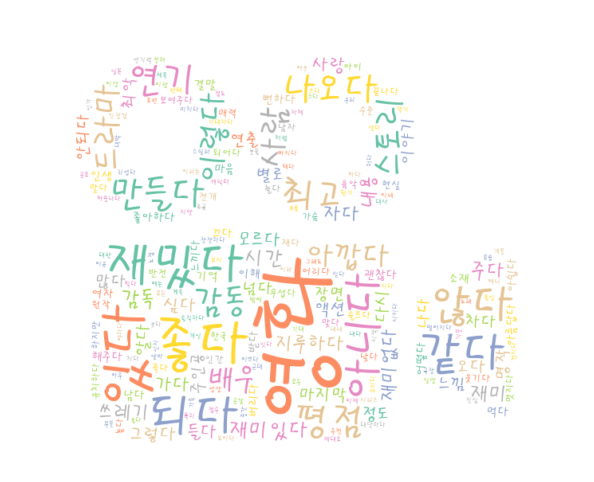

In [190]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from PIL import Image

img_mask = np.array(Image.open("movie.png"))
wordcloud = WordCloud(font_path=r'c:\Windows\Fonts\HMFMPYUN.TTF', background_color='white', colormap='Set2',mask=img_mask).generate_from_frequencies(vocab)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [196]:
# 3. 데이터셋용 단어사전/어휘사전 생성
# 최종 사용할 단어 수
# 특별한 의미의 문자 추가 : ","

VOCAB_DICT={0:'<UNK>', 1:'<PAD>'}
for idx in range(10):
    VOCAB_DICT[idx+2]=df2.iloc[idx][0]

In [197]:
VOCAB_DICT

{0: '<UNK>',
 1: '<PAD>',
 2: '영화',
 3: '좋다',
 4: '재밌다',
 5: '연기',
 6: '평점',
 7: '최고',
 8: '스토리',
 9: '드라마',
 10: '감동',
 11: '사람'}

In [202]:
### 문장을 수치화 진행
test = ["영화","최고","생각"]

for tt in test :
    print(tt in VOCAB_DICT.values())


True
True
False


In [204]:
#해당 인덱스를 배열로 만들고, 이차원 텐서로 만들어서 분석할 수 있다, => 인코딩 
def text_to_index(tokens):
    indexes = []
    for token in tokens:
        if token in VOCAB_DICT.values():
            indexes.append(list(VOCAB_DICT.keys())[list(VOCAB_DICT.values()).index(token)])
        else:
            indexes.append(0)
    return indexes

indexes = text_to_index(test)
indexes

[2, 7, 0]

In [207]:
# 수치값을 문자열로 변환 진행, 디코딩
words=[]
for tt in indexes:
    words.append(VOCAB_DICT.get(tt))
words

['영화', '최고', '<UNK>']

In [ ]:
'''
[[8,4,9],
 [5,8,2],
 [1,0,7,9,8,4],
 .
 .
 .
[9,6]] # 가장 많은 길이를 갖고 있는 텐서를 찾고, 나머지를 다 채워버리면 정보 손실이 덜 생긴다 => But, 메모리가 터진다
'''    # 